In [316]:
import numpy as np
import matplotlib.pyplot as plt

[0.8 0.4]


(-1.09, 0.89, -0.15499999999999997, 1.055)

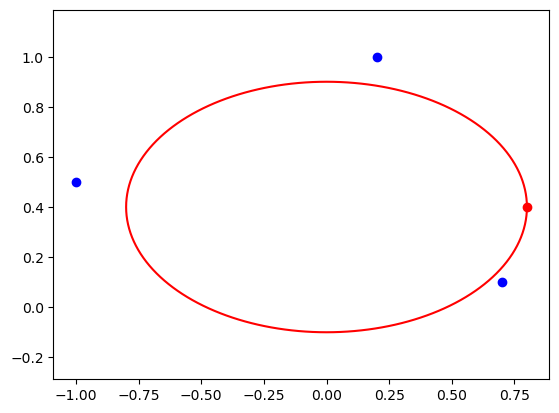

In [317]:
robot_points = np.array([])

radius_x = 0.8
radius_y = 0.5
for i in range(0, 360):
    x = np.cos(np.deg2rad(i)) * radius_x
    y = np.sin(np.deg2rad(i)) * radius_y + 0.4
    robot_points = np.append(robot_points, [x, y])

robot_points = robot_points.reshape(-1, 2)

obstacle1_point = np.array([-1, 0.5])
obstacle2_point = np.array([0.7, 0.1])
obstacle3_point = np.array([0.2, 1.0])

point = 0
plt.plot(robot_points[:, 0], robot_points[:, 1], 'r')
plt.plot(robot_points[point, 0], robot_points[point, 1], 'ro')
plt.plot(obstacle1_point[0], obstacle1_point[1], 'bo')
plt.plot(obstacle2_point[0], obstacle2_point[1], 'bo')
plt.plot(obstacle3_point[0], obstacle3_point[1], 'bo')

print(robot_points[point])
plt.axis("equal")

In [318]:
n = 2
a = 0.5
b = 0.5
k = 0.15

lambda_ = 1

def soma_X_obs(robot_point, obstacle_points, n, a, b, k, lambda_):
    
    X_obs_total = np.array([[0.0, 0.0]]).T
    for obstacle in obstacle_points:
        x_diff = robot_point[0] - obstacle[0]
        y_diff = robot_point[1] - obstacle[1]

        v = np.exp(-(np.power(x_diff, n)) / a) * np.exp(-np.power(y_diff, n) / b)
        J_x = -v * n * np.power(x_diff, n - 1) / a
        J_y = -v * n * np.power(y_diff, n - 1) / b

        J = np.array([[J_x, J_y]])

        Pseudo_inv_J = J.T @ np.linalg.inv(J @ J.T + lambda_)
        X_obs = -Pseudo_inv_J * k * v
        X_obs_total += X_obs
    
    return X_obs_total

def X_obs_juntos(robot_point, obstacle_points, n, a, b, k, lambda_):

    cummulative_v = 0.0
    cummulative_Jx = 0.0
    cummulative_Jy = 0.0

    for obstacle in obstacle_points:
        x_diff = robot_point[0] - obstacle[0]
        y_diff = robot_point[1] - obstacle[1]

        v = np.exp(-(np.power(x_diff, n)) / a) * np.exp(-np.power(y_diff, n) / b)
        J_x = -v * n * np.power(x_diff, n - 1) / a
        J_y = -v * n * np.power(y_diff, n - 1) / b

        cummulative_v += v
        cummulative_Jx += J_x
        cummulative_Jy += J_y

    J = np.array([[cummulative_Jx, cummulative_Jy]])

    Pseudo_inv_J = J.T @ np.linalg.inv(J @ J.T + lambda_)
    X_obs = -Pseudo_inv_J * k * cummulative_v

    return X_obs


X_obs_soma_list[point, 0]: [-0.00247576]
X_obs_juntos_list[point, 0]: [-0.02399457]


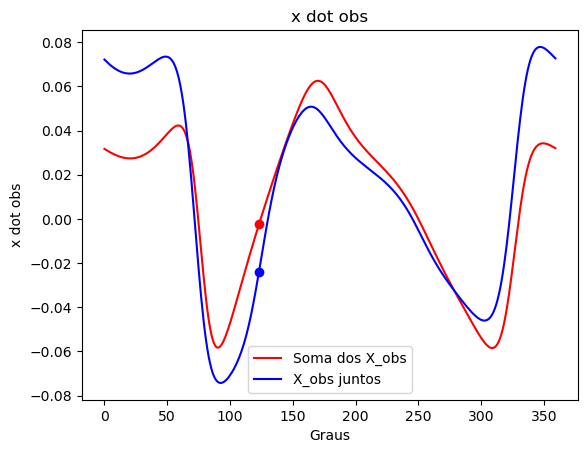

X_obs_soma_list[point, 1]: [0.00762295]
X_obs_juntos_list[point, 1]: [0.03729796]


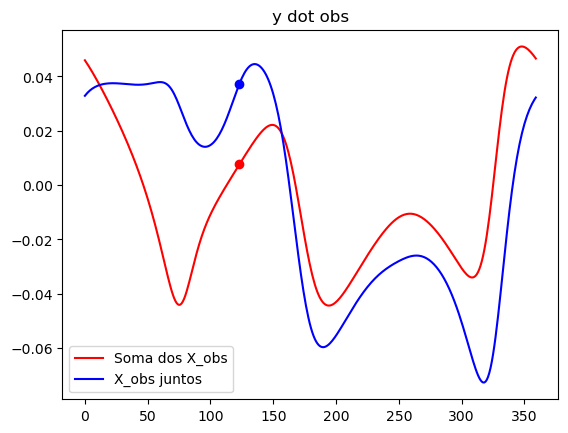

In [319]:
X_obs_soma_list = []
X_obs_juntos_list = []
for robot_point in robot_points:
    # Soma dos X_obs
    X_obs = soma_X_obs(robot_point, [obstacle1_point, obstacle2_point, obstacle3_point], n, a, b, k, lambda_)
    X_obs_soma_list.append(X_obs)

    # X_obs juntos
    X_obs = X_obs_juntos(robot_point, [obstacle1_point, obstacle2_point, obstacle3_point], n, a, b, k, lambda_)
    X_obs_juntos_list.append(X_obs)

X_obs_soma_list = np.array(X_obs_soma_list)
X_obs_juntos_list = np.array(X_obs_juntos_list)

point = 123
plt.title("x dot obs")
plt.plot(range(len(X_obs_soma_list)), X_obs_soma_list[:, 0], 'r', label="Soma dos X_obs")
plt.plot(range(len(X_obs_juntos_list)), X_obs_juntos_list[:, 0], 'b', label="X_obs juntos")
plt.scatter(point, X_obs_soma_list[point, 0], c='r')
print(f"X_obs_soma_list[point, 0]: {X_obs_soma_list[point, 0]}")
print(f"X_obs_juntos_list[point, 0]: {X_obs_juntos_list[point, 0]}")
plt.scatter(point, X_obs_juntos_list[point, 0], c='b')
plt.xlabel("Graus")
plt.ylabel("x dot obs")
plt.legend()
plt.show()

plt.title("y dot obs")
plt.plot(range(len(X_obs_soma_list)), X_obs_soma_list[:, 1], 'r', label="Soma dos X_obs")
plt.plot(range(len(X_obs_juntos_list)), X_obs_juntos_list[:, 1], 'b', label="X_obs juntos")
plt.scatter(point, X_obs_soma_list[point, 1], c='r')
plt.scatter(point, X_obs_juntos_list[point, 1], c='b')
print(f"X_obs_soma_list[point, 1]: {X_obs_soma_list[point, 1]}")
print(f"X_obs_juntos_list[point, 1]: {X_obs_juntos_list[point, 1]}")
plt.legend()
plt.show()

(-1.091594872237059,
 0.9234923169782385,
 -0.168581274887048,
 1.0556467273755736)

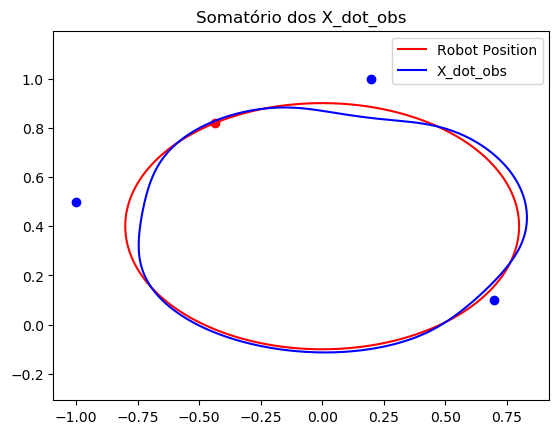

In [320]:
plt.plot(robot_points[:, 0], robot_points[:, 1], 'r', label="Robot Position")
plt.plot(robot_points[point, 0], robot_points[point, 1], 'ro')
plt.plot(obstacle1_point[0], obstacle1_point[1], 'bo')
plt.plot(obstacle2_point[0], obstacle2_point[1], 'bo')
plt.plot(obstacle3_point[0], obstacle3_point[1], 'bo')

# print(robot_points[:, 0])
# print(X_obs_soma_list[:, 0])

x_obs_soma_list_ = []
y_obs_soma_list_ = []
for x in X_obs_soma_list[:, 0]:
    x_obs_soma_list_.append(x[0])

for y in X_obs_soma_list[:, 1]:
    y_obs_soma_list_.append(y[0])

x_obs_soma_list_ = np.array(x_obs_soma_list_)
y_obs_soma_list_ = np.array(y_obs_soma_list_)

# x_obs_soma_list_.shape
x_position_X_obs = robot_points[:, 0] + x_obs_soma_list_
y_position_X_obs = robot_points[:, 1] + y_obs_soma_list_

plt.plot(x_position_X_obs, y_position_X_obs, 'b', label="X_dot_obs")
plt.title("Somatório dos X_dot_obs")
plt.legend()
plt.axis("equal")



(-1.0936406196504032,
 0.9664530126584646,
 -0.18295892136598355,
 1.056331377207904)

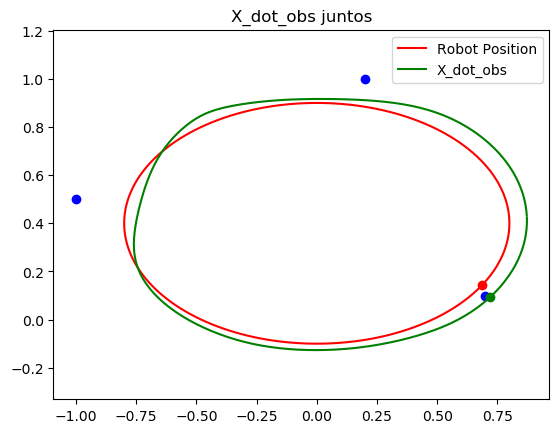

In [321]:
point = 329

plt.plot(robot_points[:, 0], robot_points[:, 1], 'r', label="Robot Position")
plt.plot(robot_points[point, 0], robot_points[point, 1], 'ro')
plt.plot(obstacle1_point[0], obstacle1_point[1], 'bo')
plt.plot(obstacle2_point[0], obstacle2_point[1], 'bo')
plt.plot(obstacle3_point[0], obstacle3_point[1], 'bo')

x_obs_juntos_list_ = []
y_obs_juntos_list_ = []

for x in X_obs_juntos_list[:, 0]:
    x_obs_juntos_list_.append(x[0])

for y in X_obs_juntos_list[:, 1]:
    y_obs_juntos_list_.append(y[0])

x_obs_juntos_list_ = np.array(x_obs_juntos_list_)
y_obs_juntos_list_ = np.array(y_obs_juntos_list_)
x_position_X_obs = robot_points[:, 0] + x_obs_juntos_list_
y_position_X_obs = robot_points[:, 1] + y_obs_juntos_list_

plt.plot(x_position_X_obs, y_position_X_obs, 'g', label="X_dot_obs")
plt.plot(x_position_X_obs[point], y_position_X_obs[point], 'go')
plt.title("X_dot_obs juntos")
plt.legend()
plt.axis("equal")